In [ ]:
# Install the Kaggle API
!pip install kaggle

# Upload your Kaggle API key file (kaggle.json) from the Downloads folder
from google.colab import files

# Upload the Kaggle API key file from the Downloads folder
uploaded = files.upload()

# Move the uploaded Kaggle API key to the correct directory
import shutil

# Get the uploaded file name
key_filename = list(uploaded.keys())[0]

# Create the .kaggle directory if it doesn't exist
!mkdir -p /root/.kaggle

# Move the uploaded Kaggle API key to the .kaggle directory
shutil.move(key_filename, '/root/.kaggle/kaggle.json')
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset2
!kaggle datasets download manasish/dataset64

# Unzip the downloaded files
!unzip -q dataset64.zip -d dataset

# List the files in the dataset directory
!ls dataset


Saving manasi_kaggle.json to manasi_kaggle.json
 99% 409M/414M [00:04<00:00, 94.2MB/s]
100% 414M/414M [00:04<00:00, 93.3MB/s]
cover  stego2


In [ ]:
import keras
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from keras.preprocessing import image
from keras.utils import to_categorical
# from tensorflow.python.keras.callbacks import TensorBoard
# from keras.preprocessing.image import ImageDataGenerator
# from time import time
from PIL import Image
import cv2


In [ ]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# import os
# import numpy as np
# from PIL import Image

# Set the directories to the image and label folders
image_directory1 = '/content/dataset/stego2'
image_directory2 = '/content/dataset/cover'

# List the image filenames and store them in `filenames`
filenames1 = [f for f in os.listdir(image_directory1) if f.endswith('.jpg') or f.endswith('.png')]
filenames2 = [f for f in os.listdir(image_directory2) if f.endswith('.jpg') or f.endswith('.png')]
# Create empty lists to store flattened images and their corresponding labels
images = []
labels = []

# Loop through each image filename
for filename in filenames1:
    # Load the image
    img = Image.open(os.path.join(image_directory1, filename))
    img = np.array(img)
    # img = cv2.resize(img, (256, 256))

    # Flatten the image into a 1D array and store it in `images`
    image = np.array(img).flatten()
    images.append(image)

    # Load the corresponding label from the text file

    label = "STEGO"
    labels.append(label)

for filename in filenames2:
    # Load the image
    img = Image.open(os.path.join(image_directory2, filename))
    img = np.array(img)
    img = cv2.resize(img, (64, 64))

    # Flatten the image into a 1D array and store it in `images`
    image = np.array(img).flatten()
    images.append(image)

    # Load the corresponding label from the text file

    label = "COVER"
    labels.append(label)

# Convert the `images` and `labels` lists into numpy arrays
X = np.array(images)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Number of total images: ", X_train.shape[0])
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

Number of total images:  2468
X_train shape:  (2468, 12288)
y_train shape:  (2468,)


In [ ]:
# # Assuming X_train is a flattened array with shape (num_samples, flattened_size)
# image_height, image_width = int(np.sqrt(X_train.shape[1])), int(np.sqrt(X_train.shape[1]))
# X_train = X_train.reshape(-1, image_height, image_width, 1)

# image_height, image_width = int(np.sqrt(X_test.shape[1])), int(np.sqrt(X_test.shape[1]))
# X_test = X_test.reshape(-1, image_height, image_width, 1)
# confused rgb channel with grayscale, value came out to be x3, so changed the value from 1 to 3.
image_height, image_width = 64, 64
X_train = X_train.reshape(-1, image_height, image_width, 3)
X_test = X_test.reshape(-1, image_height, image_width, 3)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train sample:", X_train[0])  # Print a sample image
print("y_train sample:", y_train[0])  # Print the corresponding label


X_train shape: (2468, 64, 64, 3)
y_train shape: (2468,)
X_train sample: [[[170 184 197]
  [172 186 197]
  [175 187 199]
  ...
  [214 224 225]
  [213 225 225]
  [212 224 224]]

 [[189 203 216]
  [188 200 212]
  [185 198 207]
  ...
  [215 223 225]
  [214 224 225]
  [214 224 225]]

 [[208 220 232]
  [204 217 226]
  [198 208 217]
  ...
  [215 220 224]
  [215 220 224]
  [216 221 225]]

 ...

 [[ 56  83  78]
  [ 54  81  76]
  [ 59  84  78]
  ...
  [134 144  57]
  [134 142  57]
  [133 143  57]]

 [[ 47  74  69]
  [ 44  71  66]
  [ 50  75  69]
  ...
  [137 149  67]
  [140 149  70]
  [141 152  73]]

 [[ 41  68  63]
  [ 38  65  60]
  [ 45  68  62]
  ...
  [124 135  56]
  [133 144  66]
  [141 152  74]]]
y_train sample: STEGO


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical

# Assuming you have your training and test data: X_train, y_train, X_test, y_test

# Initialize LabelBinarizer
lb = LabelBinarizer()

# Fit and transform training labels
y_train_binary = lb.fit_transform(y_train)

# Transform test labels
y_test_binary = lb.transform(y_test)

# If you still want to use to_categorical for Keras compatibility:
# Convert labels to one-hot encoding (optional)
y_train_one_hot = to_categorical(y_train_binary, num_classes=2)
y_test_one_hot = to_categorical(y_test_binary, num_classes=2)

# Now, y_train_binary and y_test_binary contain binary encoded labels,
# while y_train_one_hot and y_test_one_hot contain one-hot encoded labels.


In [ ]:
#Simple CNN
from keras import regularizers
from keras.optimizers import Adam
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout layer
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #Increase Model Complexity
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Weight Regularization
model.add(layers.Dropout(0.5))  # Add dropout layer
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001) #Adjust Learning Rate
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_binary, epochs=100, batch_size=64, validation_data=(X_test, y_test_binary))


Epoch 1/100
42/42 [==============================] - 32s 731ms/step - loss: 5.6843 - accuracy: 0.5200 - val_loss: 1.8252 - val_accuracy: 0.5454
Epoch 2/100
42/42 [==============================] - 34s 783ms/step - loss: 1.7587 - accuracy: 0.5590 - val_loss: 1.6755 - val_accuracy: 0.6553
Epoch 3/100
42/42 [==============================] - 24s 583ms/step - loss: 1.6163 - accuracy: 0.6377 - val_loss: 1.5568 - val_accuracy: 0.6667
Epoch 4/100
42/42 [==============================] - 24s 582ms/step - loss: 1.5391 - accuracy: 0.5991 - val_loss: 1.4978 - val_accuracy: 0.6145
Epoch 5/100
42/42 [==============================] - 24s 566ms/step - loss: 1.4089 - accuracy: 0.7084 - val_loss: 1.3043 - val_accuracy: 0.7642
Epoch 6/100
42/42 [==============================] - 25s 585ms/step - loss: 1.2694 - accuracy: 0.7776 - val_loss: 1.2066 - val_accuracy: 0.7948
Epoch 7/100
42/42 [==============================] - 24s 568ms/step - loss: 1.1593 - accuracy: 0.8147 - val_loss: 1.0469 - val_accuracy:

In [ ]:
training_accuracy = model.evaluate(X_train, y_train_binary)[1]
test_accuracy = model.evaluate(X_test, y_test_binary)[1]
print(training_accuracy)
print(test_accuracy)

In [ ]:
#Batch Normalisation
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from keras.optimizers import Adam
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout layer
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #Increase Model Complexity
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Weight Regularization
model.add(layers.Dropout(0.5))  # Add dropout layer
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001) #Adjust Learning Rate
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_binary, epochs=100, batch_size=64, validation_data=(X_test, y_test_binary))


Epoch 1/100
39/39 [==============================] - 36s 856ms/step - loss: 2.0250 - accuracy: 0.6989 - val_loss: 3.7092 - val_accuracy: 0.5217
Epoch 2/100
39/39 [==============================] - 32s 813ms/step - loss: 1.4531 - accuracy: 0.8314 - val_loss: 1.2794 - val_accuracy: 0.8913
Epoch 3/100
39/39 [==============================] - 33s 855ms/step - loss: 1.2145 - accuracy: 0.8687 - val_loss: 3.2620 - val_accuracy: 0.5463
Epoch 4/100
39/39 [==============================] - 32s 835ms/step - loss: 0.9483 - accuracy: 0.8975 - val_loss: 0.8346 - val_accuracy: 0.9244
Epoch 5/100
39/39 [==============================] - 32s 831ms/step - loss: 0.7136 - accuracy: 0.9315 - val_loss: 0.7514 - val_accuracy: 0.8658
Epoch 6/100
39/39 [==============================] - 31s 799ms/step - loss: 0.5578 - accuracy: 0.9425 - val_loss: 0.6023 - val_accuracy: 0.9216
Epoch 7/100
39/39 [==============================] - 34s 880ms/step - loss: 0.4575 - accuracy: 0.9433 - val_loss: 0.5074 - val_accuracy:

In [ ]:

training_accuracy = model.evaluate(X_train, y_train_binary)
test_accuracy = model.evaluate(X_test, y_test_binary)
print(training_accuracy)
print(test_accuracy)

34/34 [==============================] - 4s 129ms/step - loss: 0.0915 - accuracy: 0.9839
[0.06087380275130272, 0.9975689053535461]
[0.09151240438222885, 0.9839319586753845]


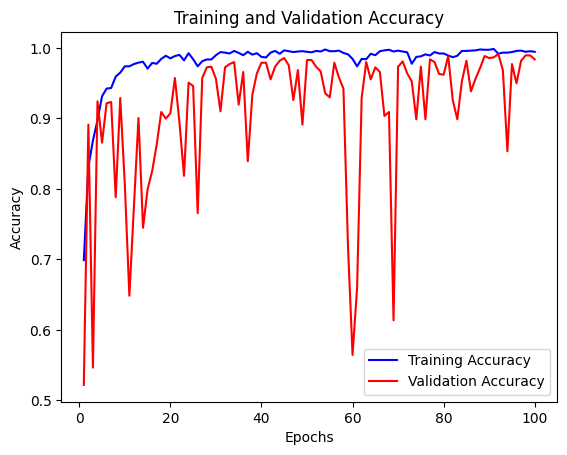

In [ ]:
#plot graph
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained a history object

# Extract accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


In [ ]:
def predict_image(model, img_path):
    img = Image.open(img_path)
    img = np.array(img)
    img = cv2.resize(img, (64, 64))
    img = img.reshape(1, 64, 64, 3)
    prediction = model.predict(img)
    print("Predicting: ", prediction)
    predicted_class = np.argmax(prediction)
    print(predicted_class)
    if predicted_class == 0:
        print("Predicted image is COVER IMAGE")
    else:
        print("Predicted image is STEGO IMAGE")
    # Assuming you have trained your model and obtained predictions in a variable named 'predictions'
# predictions = model.predict(X)

# Get the predicted classes for each sample
    predicted_classes = np.argmax(prediction, axis=1)

    # Get the unique values in the true labels (y) and the predicted classes
    unique_true_labels = np.unique(y)
    unique_predicted_classes = np.unique(predicted_classes)

    # Print the mapping between predicted classes and actual labels
    for predicted_class in unique_predicted_classes:
        corresponding_label = unique_true_labels[predicted_class]
        print(f"Predicted class {predicted_class} corresponds to label '{corresponding_label}'") #0 is cover and 1 is stego


In [ ]:
img_path = "/content/cover_img.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 149ms/step
Predicting:  [[0.4353197  0.56468034]]
1
Predicted image is STEGO IMAGE
Predicted class 1 corresponds to label 'STEGO'


In [ ]:
img_path = "/content/hidden_cover_img.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 27ms/step
Predicting:  [[0.2513907 0.7486093]]
1
Predicted image is STEGO IMAGE
Predicted class 1 corresponds to label 'STEGO'


In [ ]:
from keras.applications import ResNet50
from keras import layers, models, regularizers
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

In [ ]:
#ResNet101
from keras.applications import ResNet101
from keras import layers, models, regularizers  # Import regularizers
from tensorflow.keras.layers import BatchNormalization
# sim index, psnr,
# Load pre-trained ResNet101 model without the top (fully connected) layers
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained ResNet101 model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(2, activation='softmax'))
model.add(layers.Dense(1, activation='sigmoid'))

# model.add(layers.Reshape((2, 2, 1)))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              # loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_binary,
                    epochs=100, batch_size=64,
                    validation_data=(X_test, y_test_binary))

training_accuracy = model.evaluate(X_train, y_train_binary)
test_accuracy = model.evaluate(X_test, y_test_binary)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_15" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 12288)


In [ ]:
from keras.utils import to_categorical

# Assuming y_train_one_hot and y_test_one_hot are your labels
# Convert labels to one-hot encoding
# y_train_one_hot = to_categorical(y_train_one_hot, num_classes=2)
# y_test_one_hot = to_categorical(y_test_one_hot, num_classes=2)

# Now, the shapes should be (None, 2)
training_accuracy = model.evaluate(X_train, y_train_binary)
test_accuracy = model.evaluate(X_test, y_test_binary)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


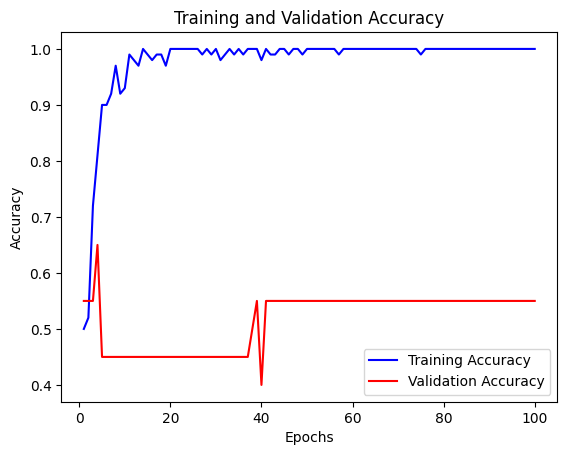

In [ ]:
#plot graph
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained a history object

# Extract accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from PIL import Image
import cv2
import numpy as np

def predict_image(model, img_path):
    try:
        img = Image.open(img_path)
        img = np.array(img)

        # Normalize the image to the same scale as training images
        img = img / 255.0

        # Resize the image to the input size expected by the model
        img = cv2.resize(img, (64, 64))

        # Add batch dimension
        img = np.expand_dims(img, axis=0)

        # Make the prediction
        prediction = model.predict(img)

        print("Raw Prediction:", prediction)

        # Assuming you have trained your model and obtained predictions in a variable named 'predictions'
        # predictions = model.predict(X)

        # Get the predicted classes for each sample
        predicted_classes = np.argmax(prediction, axis=1)

        # Print the mapping between predicted classes and actual labels
        for predicted_class in predicted_classes:
            if predicted_class == 0:
                print("Predicted image is COVER IMAGE")
            else:
                print("Predicted image is STEGO IMAGE")

    except Exception as e:
        print("Error:", str(e))
        print("Failed to read the image. Please check the image path.")


In [ ]:
img_path = "/content/cover_img.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 115ms/step
Raw Prediction: [[0.7559334  0.24406666]]
Predicted image is COVER IMAGE


In [ ]:
from PIL import Image
import cv2
import numpy as np

def predict_image(model, img_path):
    try:
        img = Image.open(img_path)
        img = np.array(img)

        # Normalize the image to the same scale as training images
        img = img / 255.0

        # Resize the image to the input size expected by the model
        # img = cv2.resize(img, (64, 64))

        # Add batch dimension
        img = np.expand_dims(img, axis=0)

        # Make the prediction
        prediction = model.predict(img)

        print("Raw Prediction:", prediction)

        # Assuming you have trained your model and obtained predictions in a variable named 'predictions'
        # predictions = model.predict(X)

        # Get the predicted classes for each sample
        predicted_classes = np.argmax(prediction, axis=1)

        # Print the mapping between predicted classes and actual labels
        for predicted_class in predicted_classes:
            if predicted_class == 0:
                print("Predicted image is COVER IMAGE")
            else:
                print("Predicted image is STEGO IMAGE")

    except Exception as e:
        print("Error:", str(e))
        print("Failed to read the image. Please check the image path.")


In [ ]:
img_path = "/content/hidden_cover_img.jpg"
# img_path = "/content/stegodsvs.jpg"
predict_image(model, img_path)

1/1 [==============================] - 0s 25ms/step
Raw Prediction: [[0.7558547  0.24414527]]
Predicted image is COVER IMAGE
